In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [5]:
trainPath = 'dataset/train/'
valPath = 'dataset/val/'
testPath = 'dataset/test/'

In [189]:
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip = True,
    zoom_range=0.2,
)
trainGenerator = trainDatagen.flow_from_directory(
    trainPath,
    target_size=(80,80),
    class_mode = 'categorical',
    batch_size=32
)
valDatagen = ImageDataGenerator(
    rescale=1./255
)
valGenerator = valDatagen.flow_from_directory(
    valPath,
    target_size=(80,80),
    class_mode = 'categorical',
    batch_size=100
)


Found 7939 images belonging to 4 classes.
Found 1719 images belonging to 4 classes.


In [190]:
(x,y) = trainGenerator.next()

[0. 1. 0. 0.]


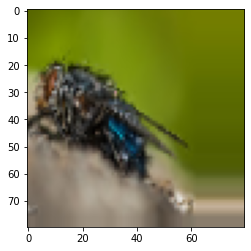

In [191]:
index = 17
print(y[index])
plt.imshow(x[index])


In [192]:
import os
load_img(trainPath + 'bee/' + os.listdir(trainPath + 'bee')[6]).size

(320, 240)

In [193]:
model = keras.models.Sequential([
    layers.Conv2D(filters=34,kernel_size=(3,3),strides=(2,2),activation='relu',input_shape=(80,80,3),kernel_regularizer=keras.regularizers.L2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=34,kernel_size=(3,3),strides=(2,2),activation='relu',kernel_regularizer=keras.regularizers.L2(0.01)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Conv2D(filters=5,kernel_size=(3,3),activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    #layers.Dropout(0.4),
    layers.Dense(4,activation='softmax')
])

In [194]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])

In [195]:
def scheduler(epoch,lr,decay_rate=0.5):
    return lr/(1+epoch*decay_rate)
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

In [196]:
history = model.fit(trainGenerator,validation_data = valGenerator,epochs=40)

Epoch 1/40
249/249 [==============================] - 25s 101ms/step - loss: 1.2814 - acc: 0.5865 - val_loss: 1.3086 - val_acc: 0.5654
Epoch 2/40
249/249 [==============================] - 25s 102ms/step - loss: 1.0786 - acc: 0.6338 - val_loss: 1.1887 - val_acc: 0.5288
Epoch 3/40
249/249 [==============================] - 24s 98ms/step - loss: 1.0035 - acc: 0.6469 - val_loss: 0.8842 - val_acc: 0.6864
Epoch 4/40
249/249 [==============================] - 25s 101ms/step - loss: 0.9530 - acc: 0.6643 - val_loss: 1.0463 - val_acc: 0.6475
Epoch 5/40
249/249 [==============================] - 27s 107ms/step - loss: 0.9149 - acc: 0.6644 - val_loss: 0.8928 - val_acc: 0.6795
Epoch 6/40
249/249 [==============================] - 25s 99ms/step - loss: 0.8974 - acc: 0.6720 - val_loss: 0.7865 - val_acc: 0.7359
Epoch 7/40
249/249 [==============================] - 24s 96ms/step - loss: 0.8775 - acc: 0.6720 - val_loss: 1.0622 - val_acc: 0.6271
Epoch 8/40
249/249 [==============================] - 24s 

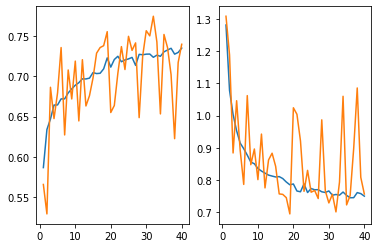

In [197]:
import matplotlib.pyplot as plt

trainAcc = history.history['acc']
trainLoss = history.history['loss']
valAcc = history.history['val_acc']
valLoss = history.history['val_loss']
epochs = np.arange(1, len(trainAcc)+1)

plt.subplot(1,2,1)
plt.plot(epochs,trainAcc)
plt.plot(epochs,valAcc)
plt.subplot(1,2,2)
plt.plot(epochs,trainLoss)
plt.plot(epochs,valLoss)